## TOD Decision Science 212 Project
Submitted to: Dr. Neha Gadhvi

Date of Submission: 13th Nov, 2022

Group No.  10

| **Name**           | **Roll No** |
|--------------------|-------------|
|  Hirmay Sandesara  |  AU1940265  |
| Christian N Warjri |  AU1920174  |
|    Dev N Mevada    |  AU1910281  |
|   Chirayu Maniar   |  AU1910630  |


# Topics covered in the project
1. Dataset description, cleaning of dataset and problem description
2. Forecasting model (may include regression model)
3. Volatility analysis (including box plot, standard deviation)
4. Risk-return analysis (sharpe ratio, covariance matrix)
5. Diversification analysis



# 1. Dataset description, cleaning of dataset and problem description
## Loading Dataset 
### The dataset is gathered from different private firms and S&P 500 data, for a period of roughly 6 years from 1st November 2014 to 10th september 2020 for all the business days having trade open, dataset consisting of around 1500 rows

In [23]:
# installing hv plot as it would be needed later
!pip install hvplot -q

# importing a bunch of libraries which would be needed for plotting, interpretating, forecasting and analysis of the dataset
import pandas as pd
import numpy as np
from math import sqrt, floor, ceil, log
from os import *
from pathlib import Path
import csv
import hvplot.pandas

# to make the dataset interactable and activate matplotlib
%matplotlib inline

In [24]:
from matplotlib import pyplot as plt

In [25]:
# now since we have installed and imported all the necessary libraries needed for our work, 
# we can now begin forward in extracting the dataset and plotting it
investment_data_set = pd.read_csv(Path("investment_data_set.csv"), index_col="date", parse_dates=True, infer_datetime_format=True)

# Printing out the first few rows of the data set
investment_data_set.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [26]:
# we can get further information about the datset through pandas dataframe info
investment_data_set.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1498 entries, 2014-10-01 to 2020-09-11
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1498 non-null   float64
 1   PAULSON & CO.INC.            1498 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1498 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1498 non-null   float64
 4   S&P 500                      1498 non-null   float64
dtypes: float64(5)
memory usage: 70.2 KB


## Now we'll do cleaning of the dataset and get the starting and ending period data

In [27]:
# We're going to clean the dataset removing any rows with any missing values

final_dataset = investment_data_set.pct_change().dropna()

# we'll also extract the date info of the starting and ending holding period

period_start = final_dataset.index[0].date()
period_end = final_dataset.index[-1].date()

# now again printing out the first few rows of the data set
final_dataset.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


# Analysis of the dataset quantitively including
2. Forecasting model (may include regression model)
3. Volatility analysis (including box plot, standard deviation)
4. Risk-return analysis (sharpe ratio, covariance matrix)

### We'll also look at the analysis of profitability by plotting the portfolios and later look at their optimization

In [64]:
temp = final_dataset.drop(['S&P 500'], axis =1)
temp.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171
2014-10-03,0.001052,0.000368,0.000394,0.001248
2014-10-06,0.002456,-0.000008,0.000066,0.000267
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587
2014-10-08,0.000390,0.000369,0.000242,0.000842


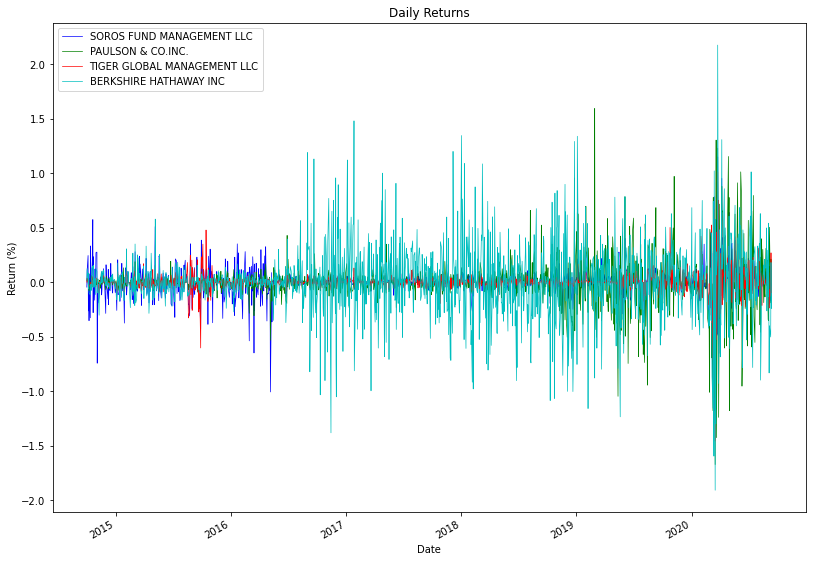

In [65]:
# visualization
# returns vs time using mpl

(100 * temp).plot(
    color = 'bgrcy', 
    figsize=(13.5, 10),
    linewidth=0.7,
    title="Daily Returns",
    xlabel="Date",
    ylabel="Return (%)"
);

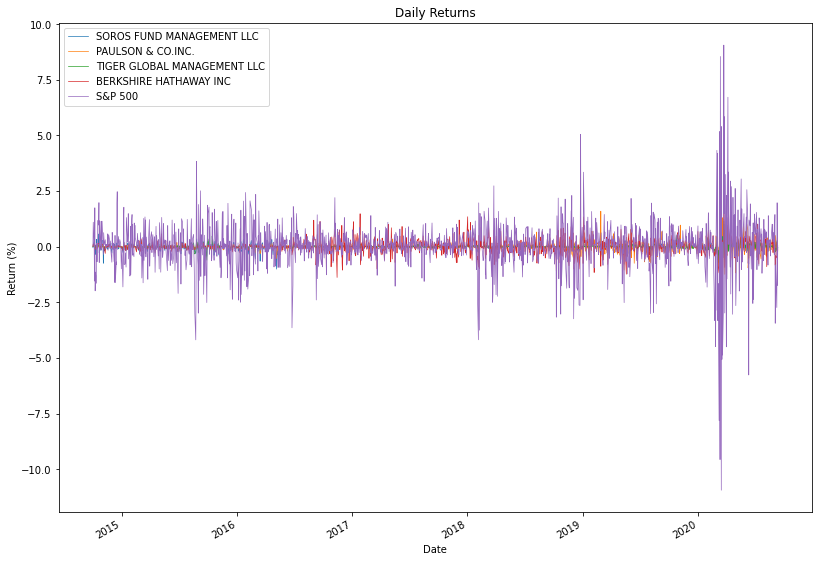

In [67]:
# visualization
# returns vs time using mpl

(100 * final_dataset).plot(
    figsize=(13.5, 10),
    linewidth=0.7,
    title="Daily Returns",
    xlabel="Date",
    ylabel="Return (%)"
);

In [28]:
# now we'll look at cumulative returns
# taking in a $1 of investment at the starting period of the holding then checking the 
# growth at the end of holding period by reviewing the
# tail of the data frame

returns_cum = (1 + final_dataset).cumprod()

returns_cum.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


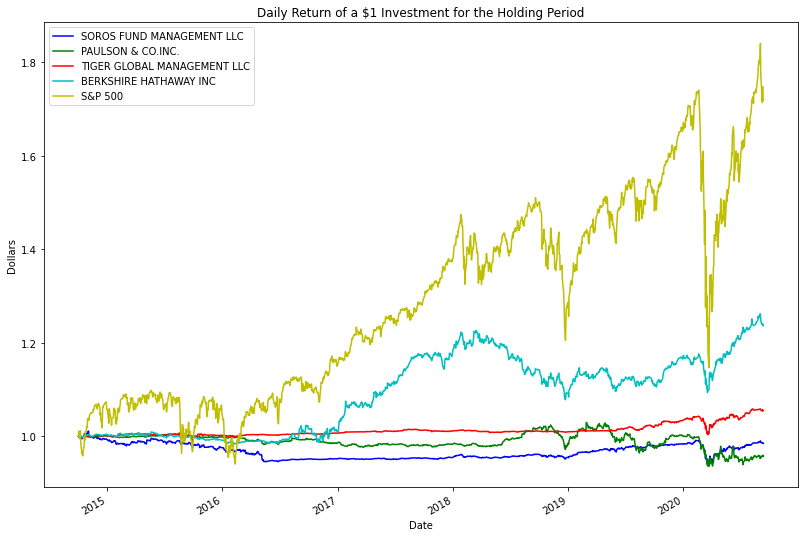

In [71]:
# trying to visualize the overall returns of cummulative of the time period from 2014 (nov) t0 2020 (sept)

(1 * returns_cum).plot(
    # selecting the bar plot graphs
    kind='line',
    color = 'bgrcy', 
    figsize=(13.5,9.5),
    linewidth=1.5,
    title="Daily Return of a $1 Investment for the Holding Period",
    xlabel="Date",
    ylabel="Dollars"
)

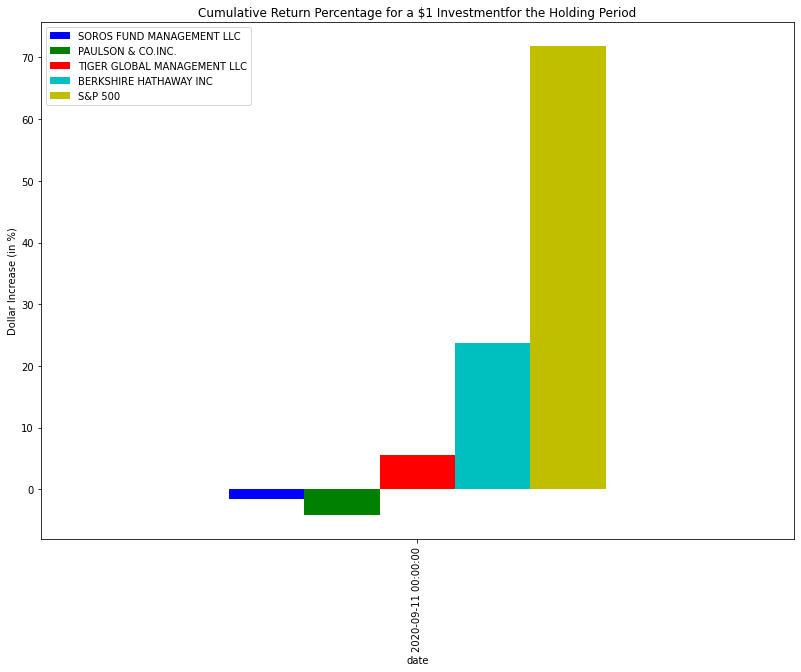

In [84]:
# for us to calculate the return on the holding period (end - start periods), we have to substract one
# from the table

returns_holding = returns_cum.tail(1) - 1

(100 * returns_holding).plot(
    # selecting the bar plot graphs
    kind='bar',
    color = 'bgrcy', 
    figsize=(13.5,9.5),
    linewidth=5,
    title="Cumulative Return Percentage for a $1 Investment for the Holding Period",
    #xlabel="Time period",
    ylabel="Dollar Increase (in %)"
)

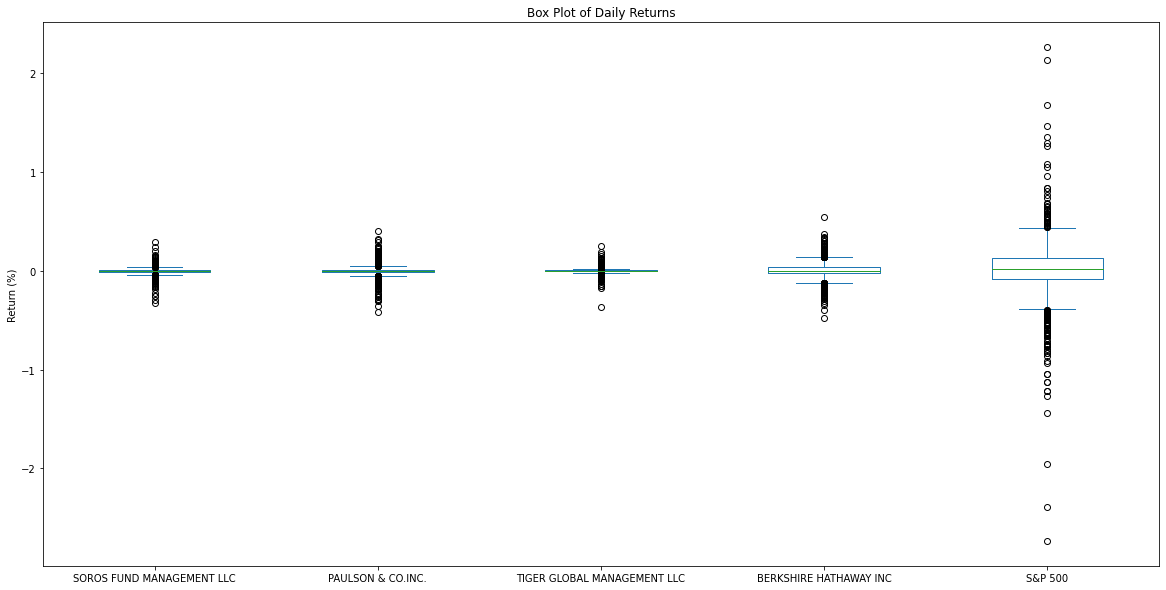

In [87]:
# from the plotting of the final datset we saw though S&P 500 had substantial growth 
# the volatility of the price was quite significant,
# we'll try to use box to visualize volatility and see the dispersion

(25 * final_dataset).plot(
    # as we're taking the box plot
    kind = 'box', 
    figsize=(20, 10), 
    title="Box Plot of Daily Returns",
    ylabel = "Return (%)",
    xlabel = 'Option names'
);

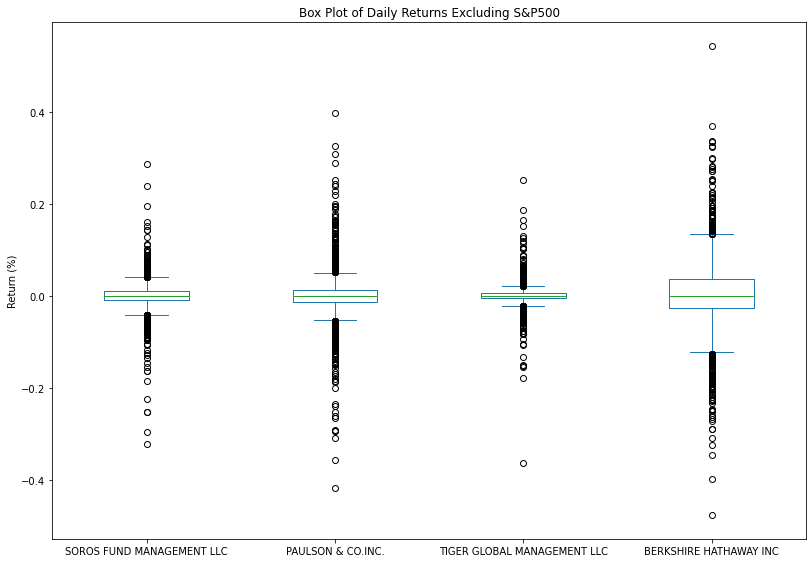

In [88]:
# As expected the volatitlity of S&P 500 is significantly substantial compared to its contemparies,
# we'll try to visualize the box plots without S&P 500 to see contemporaries volatility
# as S&P 500 is foreshadowing it

box_plot_wo_s_p= final_dataset.drop(columns="S&P 500")

(25 * box_plot_wo_s_p).plot(
    kind='box', 
    figsize=(13.5, 9.5), 
    title="Box Plot of Daily Returns Excluding S&P500",
    ylabel = "Return (%)",
    xlabel = 'Option names'
);

#### Amongst the contemporaries, Berkshire investment firm/company seems the most volatile, though much less compared to S&P 500 and least is Tiger investment firm/company 

In [33]:
# Since we have idea about the volatiltiy of the 5 different options, we expect
# the calculated/computed standard deviations to reflect that
# with highest being S&P 500 and lowest being Tiger

standard_deviations = final_dataset.std().sort_values()

standard_deviations

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Annualized Standard deviation
##### This would be needed for the portfolio optimization part like Sharpe ratio
\begin{equation}
annualized_{std} = \sqrt{252} * std
\end{equation}

In [34]:
# the results seen are what we expected of 
# now we'll try to calculate the annualized standard deviations
# this is based on the sampling done per year
# in this case as there 252 trading days (365 - weekends - holidays + intersections of both of them)

std_annual = sqrt(252) * standard_deviations

std_annual


TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

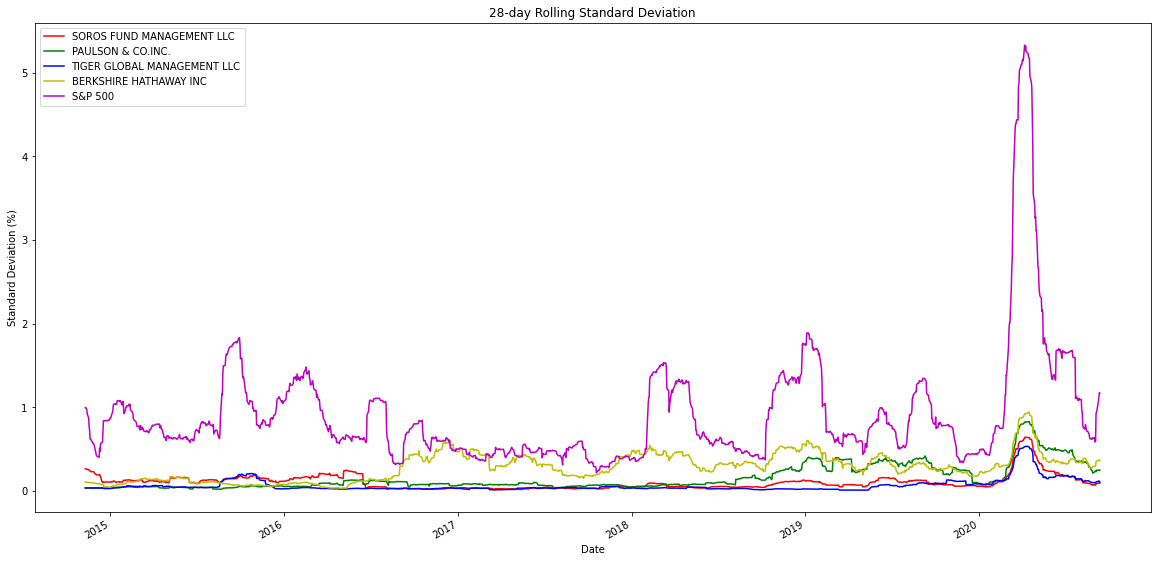

In [93]:
# Now we'll see the progression of standard deviation or rather evolution of it
# by taking in a twenty-one period window
# to get a deeper insight into the evolution

period = 28

std_21 = final_dataset.rolling(period).std()

(100 * std_21).plot(
    title="28-day Rolling Standard Deviation", 
    kind = 'line',
    color = 'rgbym',
    figsize=(20,10),
    xlabel="Date",
    ylabel= "Standard Deviation (%)"
);

#### We can see that compared to the S&P 500's  contemporaries, it possess a far substantial volatility/risk. Other funds in comparision does not show nearly as much volatility compared to it.

#### Furthermore, we can see that the standard deviation is not constant in the entire time period for any of the five option, but S&P 500 certainly seems more suceptibile. We could further analyse and see that there is a big spike in march-may of 2020 which would be attributed to the covid-19 pandemic. The tiger private investment seems to be stagnant till mid-2019 and then showing some steady increase.

#### Lastly, though the private investment firm Berkshire might appear more volatile amongst the other firms superficially, further analysing the graph we could see at different time periods firms showing similar or more levels of volatility like the private firm Soros and Tiger before mid-2016, and the investment firm Paulson from 2019-2020.

#### 4. Risk-return analysis 
We will now look at the risk-return figure and try to analyse and optimize our portfolio to maximize our returns and minimize our risks. 

## Sharpe ratio
\begin{equation}
w = w_0 w_1 \cdots w_N, \text{where } w_i \in R |w_i > 0| \sum_{i=0}^{n} w_i=1
\end{equation}



n = number of stocks = number of weights\
𝑅𝑖𝑠𝑘𝐹𝑟𝑒𝑒𝑅𝑎𝑡𝑒 = input  
𝐸𝑥𝑝𝑒𝑐𝑡𝑒𝑑𝑅𝑒𝑡𝑢𝑟𝑛𝑂𝑓𝑆𝑡𝑜𝑐𝑘 = input\
m = matrix of variance and co-varience, in which diagonals are variance of each stock data



\
\
\begin{equation}
SharpeRatio = (PortfolioExpectedReturns - RiskFreeRate)/PortfolioStandardDeviation
\end{equation}
\
\begin{equation}
PortfolioExpectedReturns = \sum_{i=0}^{n} ExpectedReturnOfStock_i * w_i
\end{equation}
\
\
\begin{equation}
ContributionToVariance_i = w_i * \sum_{j=0}^{n}w_jm_{ji} 
\end{equation}
\
\
\begin{equation}
PortfolioStandardDeviation = (\sum_{i=0}^{n}ContributionToVariance_i)^{1/2}
\end{equation}
\
\
\begin{equation}
SharpeRatio = ((\sum_{i=0}^{n} ExpectedReturnOfStock_i * w_i)  - RiskFreeRate)/(\sum_{i=0}^{n}w_i * \sum_{j=0}^{n}w_jm_{ji})^{1/2}
\end{equation}

Maximize

\begin{equation}
=\sum_{i=0}^{n} ExpectedReturnOfStock_i * w_i
\end{equation}

\begin{equation}
c =\sum_{i=0}^{n} \sum_{j=0}^{n}w_jw_im_{ji} - \sum_{i=0}^{n} ExpectedReturnOfStock_i * w_i
\end{equation}


Minimize
\begin{equation}
= \sum_{i=0}^{n}w_i * \sum_{j=0}^{n}w_jm_{ji}
\end{equation}

\begin{equation}
= \sum_{i=0}^{n} \sum_{j=0}^{n}w_jw_im_{ji}
\end{equation}

In [36]:
# Since one of the ways to evaluating a set of portfolio's performance is through Sharpe ratio
# which tries to maximize returns and minimize risks

# the sharpe ratio method requires annualized 
period = 252
mu_annual = final_dataset.mean().sort_values() * period

mu_annual

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [37]:
# now we'll calculate the sharpe ratio using the formula mentioned above
# one of the shortcuts taken is taking rfr = 0 as it is constant and doesn't affects results

rfr = 0

sharpe_ratios_annual = (mu_annual - rfr)/std_annual

sharpe_ratios_annual.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

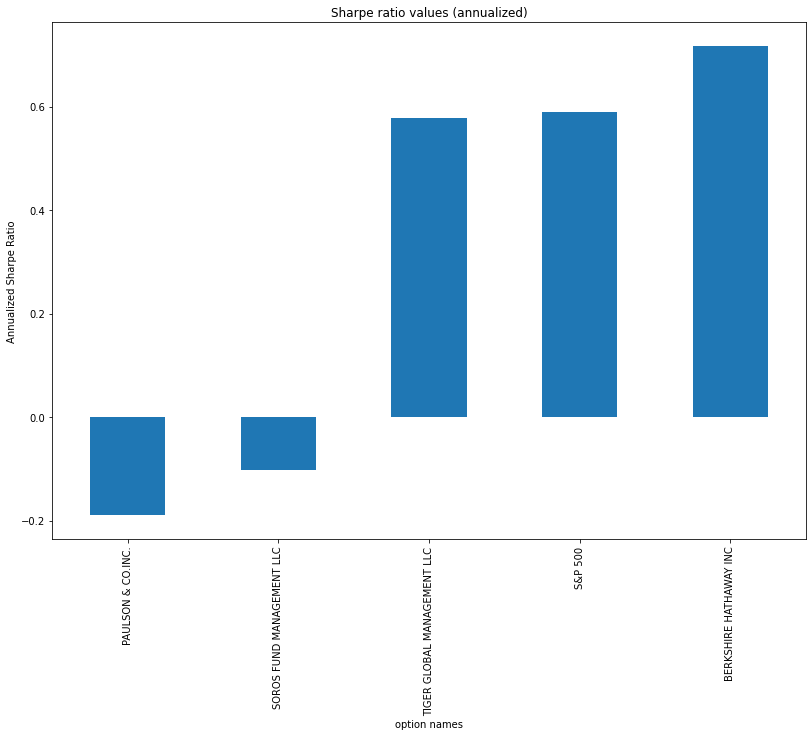

In [38]:
# plotting the values for visualizing them
sharpe_ratios_annual.sort_values().plot(
    kind = 'bar',
    title="Sharpe ratio values (annualized)",
    figsize = (13.5,9.5),
    xlabel = "option names",
    ylabel="Annualized Sharpe Ratio"
);

In [39]:
# now we'll select our candidates Berkshire and Tiger
invest_cand = sharpe_ratios_annual[(sharpe_ratios_annual.index == "TIGER GLOBAL MANAGEMENT LLC") & (sharpe_ratios_annual.index == "BERKSHIRE HATHAWAY INC")].index
# this will also have sp 500
invest_cand_sp = invest_cand.insert(len(invest_cand), "S&P 500")

#### From the computation and analysis of sharpe ratio, it is quite clear that the private investment firms like Paulson and Soros should not be considered at all as they have negative sharpe ratios and hence they didn't give more than rfr values. Berkshire seems the best option out of the bunch followed by S&P 500 then Tiger.

## Diversification analysis
We will look at the analysis of the set of portfolio we have taken react to broader market, essentially the portfolio which is resistant and less correlated makes a better choice and decreases volatility.

([<matplotlib.axis.YTick at 0x7f0e65e0c150>,
 [Text(0, 0, 'SOROS FUND MANAGEMENT LLC'),
  Text(0, 0, 'PAULSON & CO.INC.'),
  Text(0, 0, 'TIGER GLOBAL MANAGEMENT LLC'),
  Text(0, 0, 'BERKSHIRE HATHAWAY INC'),
  Text(0, 0, 'S&P 500')])

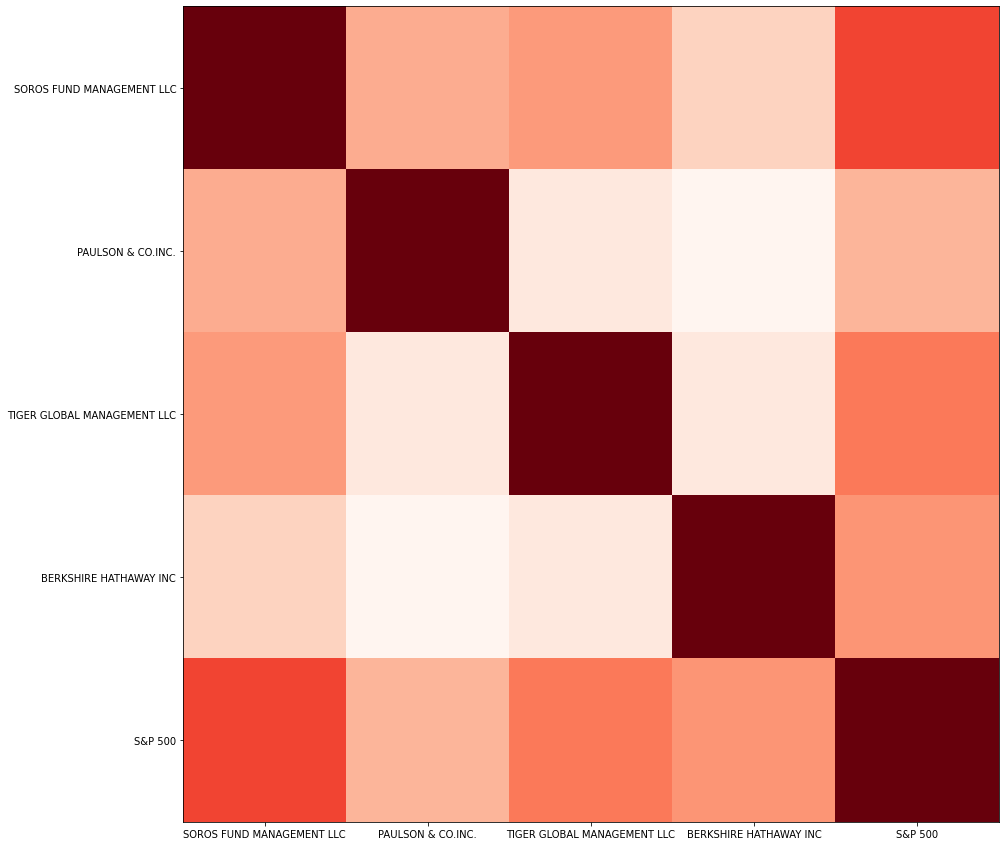

In [40]:
# Calculation of all correlations in a heatmap
correl = final_dataset.corr()
plt.figure(figsize=(15, 15))
plt.imshow(correl, cmap ="Reds")
plt.xticks(range(len(correl)), correl.columns)
plt.yticks(range(len(correl)), correl.index)

### By looking at the plotted heatmap, we can evaluate that the Berkshire private firm has lesser than Tiger investment firm

In [41]:
# just like we pre

EXAMPLE for 3 stocks: Apple, GE, Netflix





In [42]:
import numpy as np
n = 3 
rfr = 0.05
ers = [1.15, 1.23, 4.96]
m = [[0.0049,0.0012,-0.007],[0.0012,0.0025,0.0006],[-0.007,0.0006,0.0297]]


In [43]:
w = [0.50,0.50,0]
# w = [0.24,0.53,0.24]


In [44]:
pers = ers[0]*w[0]+ers[1]*w[1]+ers[2]*w[2]
pers

1.19

In [45]:
temp = (w[0]*(w[0]*m[0][0]+w[1]*m[1][0]+w[2]*m[2][0]) + w[1]*(w[0]*m[0][1]+w[1]*m[1][1]+w[2]*m[2][0])  + w[2]*(w[0]*m[0][2]+w[1]*m[1][2]+w[2]*m[2][2]))

In [46]:
temp

0.00245

In [47]:
p_sd = np.sqrt(temp)*100
p_sd

4.949747468305833

In [48]:
sr = (pers - rfr)/p_sd
sr

0.23031478015790402

Now in terms of price and no. of stocks

\begin{equation}
c =\sum_{i=0}^{n} \sum_{j=0}^{n}p_jx_jp_ix_im_{ji} - \sum_{i=0}^{n} ExpectedReturnOfStock_i * p_ix_i
\end{equation}
s.t.
\begin{equation}
\sum_{i=0}^{n}p_ix_i <= budget
\end{equation}

In [49]:
s = 0
for i in range(3):
  for j in range(3):
    s = s + w[i]*w[j]*m[j][i]
s

0.00245

In [50]:
e = 0
for i in range(3):
  e = e + ers[i]*w[i]
e

1.19

In [51]:
# Python code to demonstrate the
# use of numpy.cov
import numpy as np

x = np.array([[0, 3, 4], [1, 2, 4], [3, 4, 5]])

print("Shape of array:\n", np.shape(x))

print("Covariance matrix of x:\n", np.cov(x))


Shape of array:
 (3, 3)
Covariance matrix of x:
 [[4.33333333 2.83333333 2.        ]
 [2.83333333 2.33333333 1.5       ]
 [2.         1.5        1.        ]]


In [52]:
np.var([0, 3, 4])

2.8888888888888893